<a href="https://colab.research.google.com/github/honeyd3wy/bc_projects/blob/master/Section%201/1_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preprocessing

## 1.1. 데이터 불러오기

In [1]:
import pandas as pd

url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

raw_data = pd.read_csv(url)
raw_data.drop('Unnamed: 0', axis=1, inplace=True)
raw_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 1.2. 데이터 확인하기

In [2]:
# 자료형 확인
raw_data.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [3]:
# 결측치 확인
raw_data.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [12]:
# category 확인
col = raw_data.columns.tolist()
print("Platform category: ",raw_data.iloc[:,1].unique())
print("Genre category: ",raw_data.iloc[:,3].unique())
print("Years: ",raw_data.iloc[:,2].unique())

Platform category:  ['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Genre category:  ['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']
Years:  [2008. 2009. 2010. 2005. 2011. 2007. 2001. 2003. 2006. 2014. 2015. 2002.
 1997. 2013. 1996. 2004. 2000. 1984. 1998. 2016. 1985. 1999. 1995. 1993.
 2012. 1987. 1982. 1994. 1990. 1992. 1991. 1983. 1988. 1981. 1989. 1986.
 2017. 1980. 2020.]


## 1.3. 이상 데이터 처리하기

In [5]:
# 결측치 행 제거
import numpy as np
raw_data.replace(' ', np.NaN, inplace=True)
raw_data.dropna(inplace=True)

# 이상 데이터 처리
# 1. Year<=20인 데이터에 모두 2000 더하기
raw_data['Year'] = raw_data['Year'].apply(lambda x: x+2000 if x<=20 else x)
# 2. Year<100인 데이터에 모두 1900 더하기
raw_data['Year'] = raw_data['Year'].apply(lambda x: x+1900 if x<100 else x)
raw_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
print("Platform category: ",raw_data.iloc[:,1].unique())
print("Genre category: ",raw_data.iloc[:,3].unique())
print("Years: ",raw_data.iloc[:,2].unique())

Platform category:  ['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Genre category:  ['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']
Years:  [2008. 2009. 2010. 2005. 2011. 2007. 2001. 2003. 2006. 2014. 2015. 2002.
 1997. 2013. 1996. 2004. 2000. 1984. 1998. 2016. 1985. 1999. 1995. 1993.
 2012. 1987. 1982. 1994. 1990. 1992. 1991. 1983. 1988. 1981. 1989. 1986.
 2017. 1980. 2020.]


In [7]:
col[5:]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

## 1.4. 데이터 형변환

In [8]:
raw_data.reset_index(drop=True, inplace=True)

# Sales data 형변환

# 1. 문자 제거 후 단위 변환

for s in col[5:]:
    raw_data[s] = raw_data[s].apply(lambda x: str(int(x.replace('K',''))*0.001) if x[-1]=='K' else x)
    raw_data[s] = raw_data[s].apply(lambda x: x.replace('M','') if x[-1]=='M' else x)
    raw_data[s] = pd.to_numeric(raw_data[s]) * 1000000 # M단위 제거

raw_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


## 1.5. 데이터 저장하기

In [9]:
raw_data.to_csv('vgames2_preprocessing.csv')

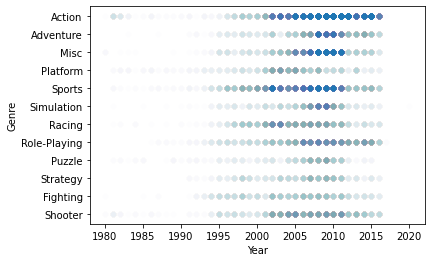

In [10]:
# Year-Genre
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Year', 
                y='Genre', 
                data=raw_data,
                alpha = 0.006)
plt.show()

In [11]:
# 지역별 합-Genre
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='', 
                y='Genre', 
                data=raw_data,
                alpha = 0.006)
plt.show()

ValueError: ignored